In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math
import random

In [3]:
df = pd.read_csv("/content/drive/MyDrive/ml2022/population.csv")
df2 = pd.read_csv("/content/drive/MyDrive/ml2022/more_than_50k.csv")
df3 = pd.read_csv("/content/drive/MyDrive/ml2022/Dataset Description.csv")

In [4]:
df

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Not in universe,Canada,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
199519,65,Self-employed-incorporated,37,2,11th grade,0,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
199520,47,Not in universe,0,0,Some college but no degree,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Not in universe,Poland,Poland,Germany,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,95
199521,16,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95


In [5]:
df2

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,57,Self-employed-incorporated,11,2,High school graduate,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
1,44,Private,3,38,High school graduate,0,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,No,1,48,94
2,54,Private,19,26,High school graduate,1550,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
3,25,Private,33,2,9th grade,0,Not in universe,Never married,Retail trade,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,1,Not in universe,2,52,95
4,26,Private,11,5,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,57,Private,14,37,High school graduate,0,Not in universe,Divorced,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
3576,63,Self-employed-not incorporated,37,12,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Separated,Business and repair services,Professional specialty,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,49,94
3577,39,Private,41,6,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Married-civilian spouse present,Hospital services,Professional specialty,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
3578,53,Self-employed-incorporated,35,2,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94


In [6]:
df3

,Column Code,Distict Values,Column,Type
0,AAGE,91,age,numerical
1,ACLSWKR,9,class of worker,categorical
2,ADTIND,52,industry code,categorical
3,ADTOCC,47,occupation code,categorical
4,AHGA,17,education,categorical
5,AHRSPAY,1240,wage per hour,numerical
6,AHSCOL,3,enrolled in edu inst last wk,categorical
7,AMARITL,7,marital status,categorical
8,AMJIND,24,major industry code,categorical
9,AMJOCC,15,major occupation code,categorical


In [7]:
df = df.replace(" ?",np.nan)
df2 = df2.replace(" ?",np.nan)

In [8]:
df

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Not in universe,Canada,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
199519,65,Self-employed-incorporated,37,2,11th grade,0,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
199520,47,Not in universe,0,0,Some college but no degree,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Not in universe,Poland,Poland,Germany,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,95
199521,16,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95


In [9]:
print(df.shape)

(199523, 40)


In [10]:
df.isnull().sum()
df2.isnull().sum()

AAGE           0
ACLSWKR        0
ADTIND         0
ADTOCC         0
AHGA           0
AHRSPAY        0
AHSCOL         0
AMARITL        0
AMJIND         0
AMJOCC         0
ARACE          0
AREORGN        0
ASEX           0
AUNMEM         0
AUNTYPE        0
AWKSTAT        0
CAPGAIN        0
CAPLOSS        0
DIVVAL         0
FILESTAT       0
GRINREG        0
GRINST        14
HHDFMX         0
HHDREL         0
MIGMTR1     1906
MIGMTR3     1906
MIGMTR4     1906
MIGSAME        0
MIGSUN      1906
NOEMP          0
PARENT         0
PEFNTVTY     162
PEMNTVTY     134
PENATVTY      93
PRCITSHP       0
SEOTR          0
VETQVA         0
VETYN          0
WKSWORK        0
YEAR           0
dtype: int64

In [11]:
# #59856
df = df.drop(['MIGMTR1','MIGMTR3','MIGMTR4','MIGSUN'],axis=1)
df2 = df2.drop(['MIGMTR1','MIGMTR3','MIGMTR4','MIGSUN'],axis=1)


In [12]:

df3.drop([24,25,26], axis=0 , inplace=True)
df3

,Column Code,Distict Values,Column,Type
0,AAGE,91,age,numerical
1,ACLSWKR,9,class of worker,categorical
2,ADTIND,52,industry code,categorical
3,ADTOCC,47,occupation code,categorical
4,AHGA,17,education,categorical
5,AHRSPAY,1240,wage per hour,numerical
6,AHSCOL,3,enrolled in edu inst last wk,categorical
7,AMARITL,7,marital status,categorical
8,AMJIND,24,major industry code,categorical
9,AMJOCC,15,major occupation code,categorical


In [13]:
print(df.shape)

(199523, 36)


In [14]:
num_df = df3[df3['Type'] == 'numerical']
num_df

,Column Code,Distict Values,Column,Type
0,AAGE,91,age,numerical
5,AHRSPAY,1240,wage per hour,numerical
16,CAPGAIN,132,capital gains,numerical
17,CAPLOSS,113,capital losses,numerical
18,DIVVAL,1478,divdends from stocks,numerical
38,WKSWORK,53,weeks worked in year,numerical


In [15]:
df['AAGE'] = pd.cut(df['AAGE'],4,labels=['children','youth','adults','seniors'])
df2['AAGE'] = pd.cut(df2['AAGE'],4,labels=['children','youth','adults','seniors'])

In [16]:
df['AAGE'].value_counts().sort_index()
df2['AAGE'].value_counts().sort_index()

children     795
youth       2038
adults       637
seniors      110
Name: AAGE, dtype: int64

In [17]:
print(df['AHRSPAY'].unique())
print(df['AHRSPAY'].max())
print(df2['AHRSPAY'].unique())
print(df2['AHRSPAY'].max())

[   0 1200  876 ... 3156 2188 1092]
9999
[   0 1550 2900 2100 1250 3259 1800 1480  500 2000 1200 1500  400 1600
  620 3300  585 2045 2751  897 2500  800 1700  885 1850  700 2200  750
  600 2300 1925 1300  625 2250 2291 4807  445 2552 2700 1260 1880 1100
 2400 1076 1400 2512  715  850 1385 2350 1900  963 3000 2739 1535 1844
 1910  951 3700 1000  450 1950 2450 1721 1215 1693  550 2532 1799  790
 2326 2010 2915 8000  525 3200 2155 1677 2613  840 1175 2256 2116 1758
 3750]
8000


In [18]:
df['AHRSPAY'] = pd.cut(df['AHRSPAY'], bins=[0, 500, 1500, 3000, 10000])
df['AHRSPAY'].value_counts().sort_index()
df2['AHRSPAY'] = pd.cut(df2['AHRSPAY'], bins=[0, 500, 1500, 3000, 10000])
df2['AHRSPAY'].value_counts().sort_index()

(0, 500]          7
(500, 1500]      47
(1500, 3000]     86
(3000, 10000]     9
Name: AHRSPAY, dtype: int64

In [19]:
print(df['CAPGAIN'].unique())
print(df['CAPGAIN'].max())
print(df2['CAPGAIN'].unique())
print(df2['CAPGAIN'].max())

[    0  5178   991  2829  3464  5556  7298 15024  1831  3137 10605 20051
  2538  3908  2407  2050  3103  1086  7688  5013  4386  2414 99999 13550
  2174  4650  4064   914  2354  4787  2009  2597  1055  6097  2635  2105
  3325  6767  2228  2062  3942 27828  9562  2176  7262  2202  2290  1173
  8614  2329  2653  7430  3456  2580 10520  2907  3471  2885  9386  2993
  7896 14084  3818  1409   594  7978  1797  2964  4934  1848  4101  3418
  3432  2774  1424  6849  4687  6418  4508  3674  3411  2936  4416  2346
 10566  7443  5455  1151 25236  2463  1455  3781 14344  4865 11678  1471
  5060   114  4931  1506   401 25124 15020  2036  3273  6514  1111  2977
 41310 18481  6497  6723 15831  2098  1264 34095 22040  3887  2961  5721
  1090  6360  3800  2387  1731  6612  9472  4594  2601  1140  2227  8530]
99999
[    0 13550 99999 27828 15024 18481  7688  4687  7430 14084  9386  7298
  9562 10520  4787 20051 25124  6097  3103 10605  4934  7896  5178  6514
  4386 15831  3273  7262 15020 11678  4064 2

In [20]:
df['CAPGAIN'] = pd.cut(df['CAPGAIN'], bins=[0, 10000, 30000, 60000, 100000])
df['CAPGAIN'].value_counts().sort_index()
df2['CAPGAIN'] = pd.cut(df2['CAPGAIN'], bins=[0, 10000, 30000, 60000, 100000])
df2['CAPGAIN'].value_counts().sort_index()

(0, 10000]         235
(10000, 30000]     350
(30000, 60000]       0
(60000, 100000]     93
Name: CAPGAIN, dtype: int64

In [21]:
print(df['CAPLOSS'].unique())
print(df['CAPLOSS'].max())
print(df2['CAPLOSS'].unique())
print(df2['CAPLOSS'].max())

[   0 1590 1977 1669 1719 2444 1421 1848 2205 2149 2001 1902 2090 1573
 2415 2377 1876 1602 1740 1974 2339 1887 1258 2597 2603 1408 1980 1721
 1816 1340 2788 2174 2042 1485 2489 2129 2457 2051 1762 2057 1672 2258
  213 1651 2206 3770 1628 1564 1668 1735 1579  625 4608 2559 2246 4356
 1844 2002 2267 3175 1380 2392 1092 1504 2238 2704 2467  810 1539 2824
 1741 1870 1944 1825  419 2547 1510  880 1617 1411 1648  323 2282 2352
 3004 1755 1429  653 2163 2179 1436 2722 3500 1640  974 1021 2754 1726
 3900 2027  772 2231 1138 1594 2465 2519 1956 1911 2472 2201 2080 3683
  155]
4608
[   0 1977 1902 1887 2559 2472 2415 2174 2392 1564 2824 3004 2377 1848
 2282 2258 1485 2444 1669 1092 1740 2246  625 2547 2231 1408  323 1876
 1380  653 2090 1825]
3004


In [22]:
df['CAPLOSS'] = pd.cut(df['CAPLOSS'], bins=[0, 1000, 2000, 3000, 5000])
df['CAPLOSS'].value_counts().sort_index()
df2['CAPLOSS'] = pd.cut(df2['CAPLOSS'], bins=[0, 1000, 2000, 3000, 5000])
df2['CAPLOSS'].value_counts().sort_index()

(0, 1000]         6
(1000, 2000]    226
(2000, 3000]    102
(3000, 5000]      3
Name: CAPLOSS, dtype: int64

In [23]:
print(df['DIVVAL'].unique())
print(df['DIVVAL'].max())
print(df2['DIVVAL'].unique())
print(df2['DIVVAL'].max())

[   0 6000  100 ...  169 1055 7958]
99999
[  500     0   200   100  2500 10000  1000    15  4631 15000 28000     2
  2300     6    90   300  1500  2000   400  7616    25   250  8000  7500
   311   650   550  6000  1625   350   800  1250   460   150    20 54500
 42000   120  3000    50  1600   104  4000    75  1362 23000  5750   900
    47  7600     3   424    27     1    37    40  5000  8500    30  3500
   121   750 10898    89   117   125   175   700    58   295 99999  1200
  1317   111  9191  1800   429   501   275   792 12500  1485    28    48
   850    82   167    45   233    94  2022   165    72   105   600  4343
 30000     7 19781 12000  6527  4585  5557 60000 25000   228 13000  3019
  2205  2902    92   592    12    62  2800  2750   325   403 50110  3675
    18   285   573 11000   658  1876 21100  1857   450 18000    85    23
  8832   225 13500   474 50000 14000   660 14519    35   337 14473   237
   405  4190 14500  1142  1150   240  2250 10321  5500    60   615    49
 15736   

In [24]:
df['DIVVAL'] = pd.cut(df['DIVVAL'], bins=[0, 5000, 10000, 50000, 100000])
df['DIVVAL'].value_counts().sort_index()
df2['DIVVAL'] = pd.cut(df2['DIVVAL'], bins=[0, 5000, 10000, 50000, 100000])
df2['DIVVAL'].value_counts().sort_index()

(0, 5000]          1339
(5000, 10000]        94
(10000, 50000]      106
(50000, 100000]      18
Name: DIVVAL, dtype: int64

In [25]:
print(df['WKSWORK'].unique())
print(df['WKSWORK'].max())
print(df2['WKSWORK'].unique())
print(df2['WKSWORK'].max())

[ 0 52 30 49 32 15 38 48  9 24 50 10 45 43  4 26 40 20  6 12 51  1  8 39
 13 16 34 14 36 44 22 41 46 28 23 35 25 17 11 37  5 42 29  2 21 19 47  3
 27  7 18 33 31]
52
[52 48 40 50  8  0 47 24 51 20 49 38 32 46 26 27 30 13 12  4 39 28 16 36
 25 29 35 21 10 44  2 15 17 14  7 37 45 18 42 41 22 34  1 33 43  3 11]
52


In [26]:
df['WKSWORK'] = pd.cut(df['WKSWORK'],4,labels=['less','more','average','more than average'])
df['WKSWORK'].value_counts().sort_index()
df2['WKSWORK'] = pd.cut(df2['WKSWORK'],4,labels=['less','more','average','more than average'])
df2['WKSWORK'].value_counts().sort_index()

less                  210
more                   55
average                71
more than average    3244
Name: WKSWORK, dtype: int64

In [27]:
print(df.isna().sum())
print(df2.isna().sum())

AAGE             0
ACLSWKR          0
ADTIND           0
ADTOCC           0
AHGA             0
AHRSPAY     188219
AHSCOL           0
AMARITL          0
AMJIND           0
AMJOCC           0
ARACE            0
AREORGN          0
ASEX             0
AUNMEM           0
AUNTYPE          0
AWKSTAT          0
CAPGAIN     192144
CAPLOSS     195617
DIVVAL      178382
FILESTAT         0
GRINREG          0
GRINST         708
HHDFMX           0
HHDREL           0
MIGSAME          0
NOEMP            0
PARENT           0
PEFNTVTY      6713
PEMNTVTY      6119
PENATVTY      3393
PRCITSHP         0
SEOTR            0
VETQVA           0
VETYN            0
WKSWORK          0
YEAR             0
dtype: int64
AAGE           0
ACLSWKR        0
ADTIND         0
ADTOCC         0
AHGA           0
AHRSPAY     3431
AHSCOL         0
AMARITL        0
AMJIND         0
AMJOCC         0
ARACE          0
AREORGN        0
ASEX           0
AUNMEM         0
AUNTYPE        0
AWKSTAT        0
CAPGAIN     2902
CAPLOSS     32

In [28]:
for i in df.columns[df.isna().any()]:
  mode=df[i].mode()[0]
  df[i].fillna(mode,inplace=True)
  df2[i].fillna(mode,inplace=True)

In [29]:
print(df.isna().sum())
print(df2.isna().sum())

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AHRSPAY     0
AHSCOL      0
AMARITL     0
AMJIND      0
AMJOCC      0
ARACE       0
AREORGN     0
ASEX        0
AUNMEM      0
AUNTYPE     0
AWKSTAT     0
CAPGAIN     0
CAPLOSS     0
DIVVAL      0
FILESTAT    0
GRINREG     0
GRINST      0
HHDFMX      0
HHDREL      0
MIGSAME     0
NOEMP       0
PARENT      0
PEFNTVTY    0
PEMNTVTY    0
PENATVTY    0
PRCITSHP    0
SEOTR       0
VETQVA      0
VETYN       0
WKSWORK     0
YEAR        0
dtype: int64
AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AHRSPAY     0
AHSCOL      0
AMARITL     0
AMJIND      0
AMJOCC      0
ARACE       0
AREORGN     0
ASEX        0
AUNMEM      0
AUNTYPE     0
AWKSTAT     0
CAPGAIN     0
CAPLOSS     0
DIVVAL      0
FILESTAT    0
GRINREG     0
GRINST      0
HHDFMX      0
HHDREL      0
MIGSAME     0
NOEMP       0
PARENT      0
PEFNTVTY    0
PEMNTVTY    0
PENATVTY    0
PRCITSHP    0
SEOTR       0
VETQVA      0
VETYN       0
WKSWORK

In [30]:
df = pd.get_dummies(df)
df_encode = df.to_numpy()
print(df.shape)

(199523, 389)


In [31]:
df2 = pd.get_dummies(df2)
df2_encode = df2.to_numpy()

In [32]:
from sklearn.decomposition import PCA
pca=PCA(35)
pca2=PCA(35)
pca=pca.fit(df)
pca2=pca2.fit(df2)
pca_t=pca.transform(df)
pca2_t=pca2.transform(df2)
pca_df=pd.DataFrame(pca_t)
pca2_df=pd.DataFrame(pca2_t)
print(df.shape)
print(pca_t.shape)
print(df2.shape)
print(pca2_t.shape)

(199523, 389)
(199523, 35)
(3580, 332)
(3580, 35)


In [33]:
%pip install pyclustering
import pyclustering
from pyclustering.cluster.kmedians import kmedians
import pickle

samples=pca_df.copy()
ans=[]
val =[]
for k in range(10,25):
  val.append(k)
  samples = pca_df[0:k]
  model=kmedians(pca_df,samples)
  model.process() 
  ans.append(model.get_total_wce()/k)
print(ans)
#[139564.81278467007, 121414.15644633761, 116614.89241569447, 109000.19661787974, 80145.46480987668, 79737.31174629285, 79678.97381217888, 69578.66931545633, 65713.18768681987, 58540.96364592163, 55625.23076954232, 54435.43640944459, 51961.098390833475, 47272.204042469726, 46660.320181198425]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[913296.5032821825, 830269.5484383478, 801315.6223048741, 583192.017642346, 493549.38281498366, 408091.626394715, 385334.4488931741, 327661.5153349093, 298424.61977847165, 300233.0962546721, 241888.7470386348, 254935.6682579371, 230942.9218733718, 217715.93078831705, 204047.80295625931]


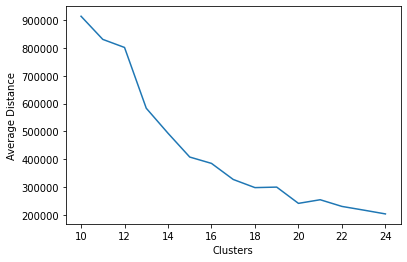

In [34]:
cluster = list()
for k in range(10,25):
  cluster.append(k)
  plt.plot(cluster, ans)
  plt.xlabel('Clusters')
  plt.ylabel('Average Distance')
  plt.show()

In [35]:
samples = pca_df[0:21]
model=kmedians(pca_df,samples)
model.process() 
model.get_total_wce()/21
print(model.get_total_wce()/21)

254935.6682579371


In [36]:

best_gen=model.predict(pca_t)
best_gen=pd.Series(best_gen)
new_df1=pd.DataFrame(best_gen.value_counts().sort_index(),columns=['General Population'])


In [37]:
samples2=pca2_df.copy()
ans2=[]
val2 =[]
for k in range(10,25):
  val2.append(k)
  samples2 = pca2_df[0:k]
  model2=kmedians(pca2_df,samples2)
  model2.process() 
  ans2.append(model2.get_total_wce()/k)
print(ans2)

[15455.630497911605, 13595.381898120668, 10969.297371165027, 10079.237348546396, 8571.487043419109, 7920.756272760796, 7673.130871419957, 6533.898294531225, 5925.5243718689, 5561.378116031806, 5226.785100320825, 4852.008657885736, 4551.23007899747, 3924.706224776895, 4523.8182113302055]


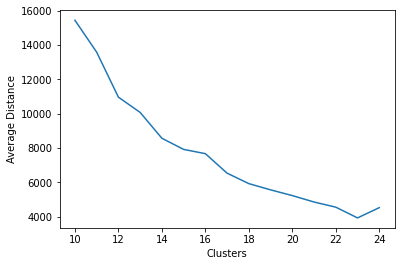

In [39]:
cluster2 = list()
for k in range(10,25):
  cluster2.append(k)
plt.plot(cluster2, ans2)
plt.xlabel('Clusters')
plt.ylabel('Average Distance')
plt.show()

In [45]:
samples2 = pca2_df[0:16]
model2=kmedians(pca2_df,samples2)
model2.process() 
model2.get_total_wce()/16
print(model.get_total_wce()/16)

334603.06458854245


In [46]:
best_50k=model2.predict(pca2_t)
best_50k=pd.Series(best_50k)
new_df2=pd.DataFrame(best_50k.value_counts().sort_index(),columns=['50k population'])

<Figure size 720x720 with 0 Axes>

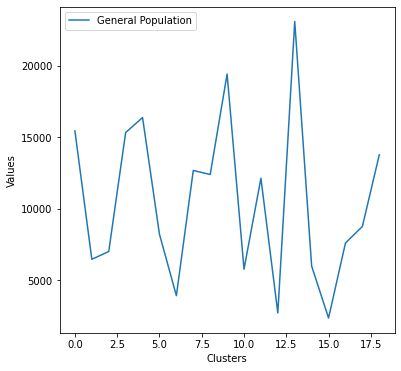

<Figure size 720x720 with 0 Axes>

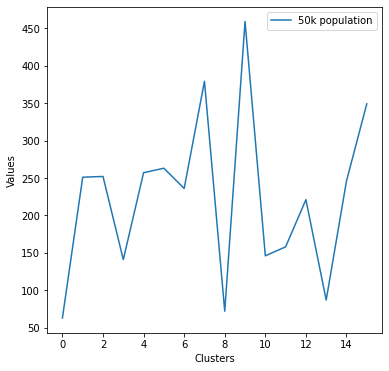

In [47]:

plt.figure(figsize=(10,10))
new_df1.plot(kind='line',xlabel='Clusters',ylabel='Values',legend=True,figsize=(6,6))
plt.show()
plt.figure(figsize=(10,10))
new_df2.plot(kind='line',xlabel='Clusters',ylabel='Values',legend=True,figsize=(6,6))
plt.show()
